In [7]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scanpy as sc
import sklearn.decomposition #import TruncatedSVD
import scipy 
import sparse, io
import os
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles,
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'
os.chdir('/lunarc/nobackup/projects/regen_immuno/tools/samap/transcriptomes/')

In [8]:
# Load data
#Load Human dataset
adata_hum= sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleen.cellxgene.h5ad')

In [31]:
gene_id=adata_hum.var["gene_ids-HCATisStabAug177376567"]
gene_name=adata_hum.var.index
mapping_dict= dict(zip(gene_id, gene_name))
adata_hum.var_names=gene_id

In [58]:
#Load dataset
human_anno=pd.read_table("/lunarc/nobackup/projects/regen_immuno/LabMemberScratchDir/Nick/human/refs/20231019.human.EGGNOG.annots.tsv",sep="\t")

In [59]:
human_anno

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,infernal,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,...,EggNM.KEGG_Module,EggNM.KEGG_Reaction,EggNM.KEGG_rclass,EggNM.BRITE,EggNM.KEGG_TC,EggNM.CAZy,EggNM.BiGG_Reaction,EggNM.PFAMs,transcript,peptide
0,ENSG00000271254,ENST00000612640,.,.,ENST00000612640.pep,72-2090[+],.,.,.,.,...,.,.,.,.,.,.,.,DUF1220,.,.
1,ENSG00000271254,ENST00000614336,.,.,ENST00000614336.pep,402-2213[+],.,.,.,.,...,.,.,.,.,.,.,.,DUF1220,.,.
2,ENSG00000265261,ENST00000583058,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,ENSG00000206075,ENST00000382771,.,.,ENST00000382771.pep,96-1223[+],.,.,.,.,...,.,.,.,"ko00000,ko00001",.,.,.,Serpin,.,.
4,ENSG00000206075,ENST00000424602,.,.,ENST00000424602.pep,174-560[+],.,.,.,.,...,.,.,.,"ko00000,ko00001",.,.,.,Serpin,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252889,ENSG00000223482,ENST00000433920,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
252890,ENSG00000223482,ENST00000433530,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
252891,ENSG00000277374,ENST00000612925,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
252892,ENSG00000277428,ENST00000618679,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [32]:
adata_hum.var_names_make_unique()
adata_hum.write_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleen.cellxgene_ensembl.h5ad')

In [45]:
np.random.seed(42)
org1='/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_run2.h5ad'
org2 ='/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Tabula_immune.h5ad'
filenames = {'pw':org1,'hs':org2}

sm = SAMAP(
        filenames,
        f_maps = 'maps/',
        save_processed=True, #if False, do not save the processed results to `*_pr.h5ad`
        keys = {'pw':'leiden','hs':'free_annotation'},
   )

Processing data pw from:
/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_run2.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9387882678664142
Iteration: 2, Convergence: 0.011277713243295311
Computing the UMAP embedding...


/home/nikvaku/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 25.520262002944946 seconds
Not updating the manifold...
Processing data hs from:
/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Tabula_immune.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9155454464876372
Iteration: 2, Convergence: 0.012358806973820349
Computing the UMAP embedding...


/home/nikvaku/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 168.40506315231323 seconds
Not updating the manifold...
2406 `pw` gene symbols match between the datasets and the BLAST graph.
18696 `hs` gene symbols match between the datasets and the BLAST graph.


In [46]:
sm.run()
samap = sm.samap

Prepping datasets for translation.


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Translating feature spaces pairwise.
Projecting data into joint latent space. 7.279146194458008
Correcting data with means. 16.028491735458374
Expanding neighbourhoods of species pw...
Expanding neighbourhoods of species hs...
Indegree coarsening
0/5 (0, 91888)
1/5 (20000, 91888)
2/5 (40000, 91888)
3/5 (60000, 91888)
4/5 (80000, 91888)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
          hs        pw
hs  0.000000  0.325971
pw  0.463043  0.000000
Calculating gene-gene correlations in the homology graph...


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Prepping datasets for translation.


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Translating feature spaces pairwise.
Projecting data into joint latent space. 6.393362522125244
Correcting data with means. 15.611739873886108
Expanding neighbourhoods of species pw...
Expanding neighbourhoods of species hs...
Indegree coarsening
0/5 (0, 91888)
1/5 (20000, 91888)
2/5 (40000, 91888)
3/5 (60000, 91888)
4/5 (80000, 91888)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 2 complete.
Alignment scores:
          hs        pw
hs  0.000000  0.386809
pw  0.511942  0.000000
Calculating gene-gene correlations in the homology graph...


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Prepping datasets for translation.


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Translating feature spaces pairwise.
Projecting data into joint latent space. 6.354203224182129
Correcting data with means. 14.576611757278442
Expanding neighbourhoods of species pw...
Expanding neighbourhoods of species hs...
Indegree coarsening
0/5 (0, 91888)
1/5 (20000, 91888)
2/5 (40000, 91888)
3/5 (60000, 91888)
4/5 (80000, 91888)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
         hs        pw
hs  0.00000  0.398114
pw  0.52782  0.000000
Running UMAP on the stitched manifolds.
Elapsed time: 7.6934926271438595 minutes.


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [35]:
samap.adata

AnnData object with n_obs × n_vars = 106758 × 88209
    obs: 'pw_leiden', 'hs_Donor', 'hs_Time', 'hs_donor_time', 'hs_organ', 'hs_patient', 'hs_sample', 'hs_leiden', 'hs_Celltypes_GenomeBiol_2019', 'hs_Celltypes_updated_July_2020', 'batch', 'species'
    uns: 'neighbors', 'gnnm_corr', 'mapping_K', 'umap', 'homology_gene_names_dict'
    obsm: 'X_umap'
    layers: 'X_disp'
    obsp: 'connectivities'
    varp: 'homology_graph_reweighted', 'homology_graph'

In [56]:
keys_ct = {'pw':'leiden','hs':'free_annotation'}
Ct,MappingTable_ct = get_mapping_scores(sm,keys_ct,n_top=1000)
Ct.head()
MappingTable_ct.head()

,pw_0,pw_1,pw_10,pw_11,pw_12,pw_13,pw_14,pw_15,pw_16,pw_17,...,hs_plasmablast,hs_plasmacytoid dendritic cell,hs_platelet,hs_regulatory T cell,hs_regulatory t cell,hs_retina - microglia,hs_t cell,hs_t cells,hs_thymocyte,hs_type I NK T cell
pw_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.022533,0.008440,0.022102,0.017446,0.006625,0.027411,0.008453,0.001903,0.001693
pw_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002646,0.000000,0.000097,0.000000,0.000339,0.017216,0.001095,0.000000,0.297416
pw_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003532,0.000000,0.000081,0.000196,0.000158,0.001634,0.000022,0.000000,0.000084
pw_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001092,0.000376,0.000542,0.000190,0.001079,0.001552,0.018814,0.000000,0.000626
pw_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.048243,0.001442,0.000237,0.001659,0.017908,0.001431,0.000000,0.018104


In [57]:
Ct

pw_6                  \
                                      Cluster Alignment score   
0        hs_CD4-positive alpha-beta thymocyte        0.584668   
1                   hs_CD4 helper T cell-like        0.526657   
2               hs_cd4-positive helper t cell        0.505161   
3        hs_CD8-positive alpha-beta thymocyte        0.418635   
4                                   hs_T cell        0.400485   
..                                        ...             ...   
169                         hs_Dendritic cell             0.0   
170                   hs_Cycling immune cells             0.0   
171  hs_Cd141 positive myeloid dendritic cell             0.0   
172                     hs_CD4 T cell-low RNA             0.0   
173                             hs_Neutrophil             0.0   

    hs_CD4-positive alpha-beta thymocyte                  \
                                 Cluster Alignment score   
0                                   pw_6        0.584668   
1                                   pw_2        0.387417   
2                                  pw_17        0.126512   
3                                   pw_0        0.052903   
4                                  pw_21        0.033418   
..                                   ...             ...   
169                          hs_Monocyte             0.0   
170               hs_Monocyte/Macrophage             0.0   
171                         hs_Monocytes             0.0   
172                  hs_NAMPT neutrophil             0.0   
173                  hs_type I NK T cell             0.0   

                         pw_13                        hs_macrophage  \
                       Cluster Alignment score              Cluster   
0                hs_macrophage        0.540397                pw_13   
1               hs_Macrophages        0.115044                 pw_4   
2                  hs_platelet        0.102307                pw_14   
3                hs_Macrophage        0.038465                 pw_8   
4    hs_non-classical monocyte        0.030592                pw_16   
..                         ...             ...                  ...   
169   hs_Innate lymphoid cells             0.0  hs_NAMPT neutrophil   
170        hs_Langerhans cells             0.0         hs_NK T cell   
171              hs_Leucocytes             0.0           hs_NK cell   
172               hs_Mast Cell             0.0          hs_NK cells   
173        hs_type I NK T cell             0.0  hs_type I NK T cell   

                    hs_CD4 helper T cell-like                  ...  \
    Alignment score                   Cluster Alignment score  ...   
0          0.540397                      pw_6        0.526657  ...   
1          0.309742                     pw_17        0.099867  ...   
2           0.23888                     pw_26        0.064219  ...   
3          0.214032                      pw_2        0.033276  ...   
4           0.20539                      pw_0        0.019774  ...   
..              ...                       ...             ...  ...   
169             0.0             hs_Macrophage             0.0  ...   
170             0.0            hs_Macrophages             0.0  ...   
171             0.0              hs_Mast Cell             0.0  ...   
172             0.0              hs_Mast cell             0.0  ...   
173             0.0       hs_type I NK T cell             0.0  ...   

                     hs_cd4 cd8 T cell                  \
                               Cluster Alignment score   
0                                 pw_0             0.0   
1    hs_cd8-positive alpha-beta T cell             0.0   
2                    hs_cd4 cd8 T cell             0.0   
3    hs_cd4-positive alpha-beta T cell             0.0   
4    hs_cd4-positive alpha-beta t cell             0.0   
..                                 ...             ...   
169       hs_Erythroid Progenitor Cell             0.0   
170         hs_Hematopoietic stem cell             0.0   

In [52]:
Ct
#Ct.to_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Mappingtable_ct_pw&hs_cellbender_hs_tabula.csv')

hs_CD4-positive alpha-beta thymocyte                  \
                                 Cluster Alignment score   
0                                   pw_6        0.807988   
1                                   pw_2        0.676988   
2                                  pw_17        0.270651   
3                                   pw_0        0.214445   
4                                  pw_21        0.070749   
..                                   ...             ...   
169                          hs_Monocyte             0.0   
170               hs_Monocyte/Macrophage             0.0   
171                         hs_Monocytes             0.0   
172                  hs_NAMPT neutrophil             0.0   
173                  hs_type I NK T cell             0.0   

                                         pw_6                  \
                                      Cluster Alignment score   
0        hs_CD4-positive alpha-beta thymocyte        0.807988   
1                   hs_CD4 helper T cell-like        0.761402   
2                                   hs_T cell         0.75525   
3               hs_cd4-positive helper t cell        0.695696   
4                                hs_NK T cell        0.694529   
..                                        ...             ...   
169                         hs_Dendritic cell             0.0   
170                   hs_Cycling immune cells             0.0   
171  hs_Cd141 positive myeloid dendritic cell             0.0   
172                     hs_CD4 T cell-low RNA             0.0   
173                             hs_Neutrophil             0.0   

    hs_classical monocyte                                       pw_23  \
                  Cluster Alignment score                     Cluster   
0                   pw_23        0.783518       hs_classical monocyte   
1                    pw_4        0.488543                 hs_monocyte   
2                    pw_8        0.457099               hs_macrophage   
3                   pw_22        0.184505    hs_intermediate monocyte   
4                   pw_18         0.11698   hs_non-classical monocyte   
..                    ...             ...                         ...   
169          hs_Monocytes             0.0  hs_Hematopoietic stem cell   
170   hs_NAMPT neutrophil             0.0    hs_Innate lymphoid cells   
171          hs_NK T cell             0.0         hs_Langerhans cells   
172            hs_NK cell             0.0               hs_Leucocytes   
173   hs_type I NK T cell             0.0               hs_Neutrophil   

                             hs_plasma cell                  ...  \
    Alignment score                 Cluster Alignment score  ...   
0          0.783518                    pw_3        0.763607  ...   
1          0.594667                    pw_9        0.724257  ...   
2            0.2368                   pw_11        0.577909  ...   
3          0.096676                    pw_0        0.567351  ...   
4          0.050002                    pw_1        0.389599  ...   
..              ...                     ...             ...  ...   
169             0.0  hs_Monocyte/Macrophage             0.0  ...   
170             0.0            hs_Monocytes             0.0  ...   
171             0.0     hs_NAMPT neutrophil             0.0  ...   
172             0.0            hs_NK T cell             0.0  ...   
173             0.0     hs_type I NK T cell             0.0  ...   

                      hs_B lymphocytes                  \
                               Cluster Alignment score   
0                                 pw_0             0.0   
1    hs_cd8-positive alpha-beta T cell             0.0   
2                    hs_cd4 cd8 T cell             0.0   
3    hs_cd4-positive alpha-beta T cell             0.0   
4    hs_cd4-positive alpha-beta t cell             0.0   
..                                 ...             ...   
169       hs_Erythroid Progenitor Cell             0.0   
170         hs_Hemat

In [44]:
from samap.utils import save_samap
save_samap(sm, '/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/pw_spl_hs_spl_SAM_cellbender.pkl')

<Axes: >

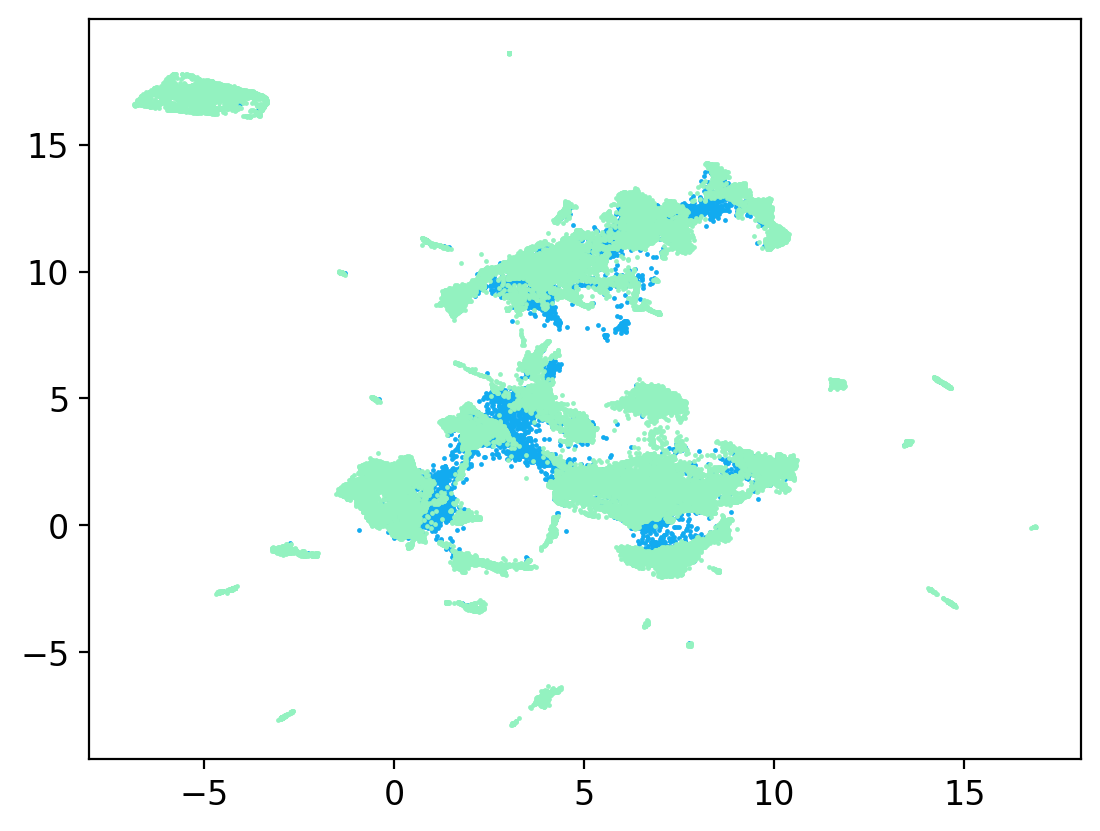

In [50]:
sm.scatter()